In [1]:
# Declaramos las librerías
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Cargar el conjunto de datos MNIST
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 25s 2us/step


In [3]:
# Normalizar los datos de las imágenes para que los valores de los píxeles estén entre 0 y 1
x_train, x_test = x_train / 255.0, x_test / 255.0

In [7]:
# Visualizar 3 imágenes de cada dígito
fig, axes = plt.subplots(nrows=10, ncols=3, figsize=(3, 6))
for i in range(10):
    indices = np.where(y_train == i)[0][:3]
    for j in range(3):
        ax = axes[i, j]
        ax.imshow(x_train[indices[j]], cmap='gray')
        ax.axis('off')
plt.tight_layout()
plt.show()

In [8]:
# Crear un modelo secuencial con la API de Keras
model = Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

In [9]:
# Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
# Entrenar el modelo
model.fit(x_train, y_train, epochs=5)

Epoch 1/5


2024-05-08 19:59:28.486188: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1875/1875 [==============================] - 1s 601us/step - loss: 0.2932 - accuracy: 0.9145
Epoch 2/5
1875/1875 [==============================] - 1s 598us/step - loss: 0.1378 - accuracy: 0.9595
Epoch 3/5
1875/1875 [==============================] - 1s 576us/step - loss: 0.1051 - accuracy: 0.9676
Epoch 4/5
1875/1875 [==============================] - 2s 851us/step - loss: 0.0850 - accuracy: 0.9743
Epoch 5/5
1875/1875 [==============================] - 1s 605us/step - loss: 0.0737 - accuracy: 0.9768


In [11]:
# Evaluar el modelo con el conjunto de datos de prueba
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 321us/step - loss: 0.0711 - accuracy: 0.9777


[0.07105842232704163, 0.9776999950408936]

1/1 [==============================] - 0s 9ms/step


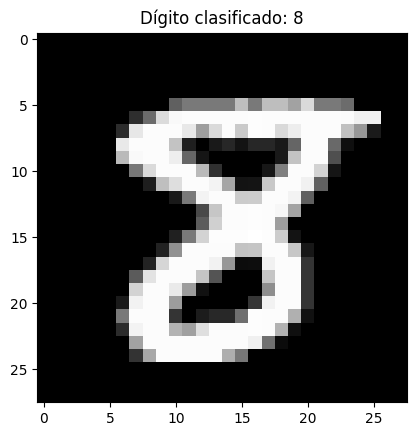

In [22]:
# Función para probar una nueva imagen
def test_new_image(img_path):
    # Cargar la imagen, convertirla al tamaño adecuado y en escala de grises
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(28, 28), color_mode='grayscale')
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.image.rgb_to_grayscale(img_array) if img_array.shape[-1] == 3 else img_array
    img_array = img_array / 255.0  # Normalizar la imagen
    img_array = np.expand_dims(img_array[:,:,0], 0)  # Asegurarse de que la imagen tiene la forma correcta (1, 28, 28)

    predictions = model.predict(img_array)
    predicted_digit = np.argmax(predictions)
    plt.imshow(img_array[0], cmap='gray')  # Mostrar la imagen adecuada
    plt.title(f'Dígito clasificado: {predicted_digit}')
    plt.show()

# Probamos nuestra imagen
test_new_image('8.png')

## Ejercicio con Fashion M-Nist

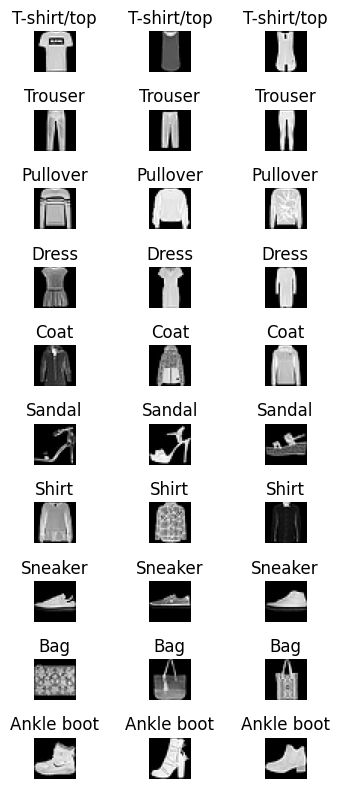

In [29]:
# Cargar el conjunto de datos Fashion MNIST
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalizar los datos de las imágenes para que los valores de los píxeles estén entre 0 y 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Categorías de Fashion MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Visualizar 3 imágenes de cada categoría
fig, axes = plt.subplots(nrows=10, ncols=3, figsize=(4, 8))
for i in range(10):
    indices = np.where(y_train == i)[0][:3]
    for j in range(3):
        ax = axes[i, j]
        ax.imshow(x_train[indices[j]], cmap='gray')
        ax.axis('off')
        ax.set_title(class_names[i])
plt.tight_layout()
plt.show()